# Syracuse University Basketball Analytics Challenge
## Tulane University - Spring 2023 - New Orleans, LA
-----
**Mikey Sison, Hayden Outlaw, Isaac Popper, Nic Rioja, Max Yazdian** for Tulane Sports Analytics Club



In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn as sk
assert sk.__version__ >= "0.20"

# XGBoost Import
import xgboost as xgb
xgb.set_config(verbosity = 0)
# assert xgb.get_config["verbosity"] == 0
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn as sk
assert sk.__version__ >= "0.20"

# XGBoost Import
import xgboost as xgb
xgb.set_config(verbosity = 0)
# assert xgb.get_config["verbosity"] == 0

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(0)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from IPython.display import display, HTML

pd.set_option('display.max_columns', None)# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn as sk
assert sk.__version__ >= "0.20"

# XGBoost Import
import xgboost as xgb
xgb.set_config(verbosity = 0)
# assert xgb.get_config["verbosity"] == 0

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(0)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from IPython.display import display, HTML

pd.set_option('display.max_columns', None)# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn as sk
assert sk.__version__ >= "0.20"

# XGBoost Import
import xgboost as xgb
xgb.set_config(verbosity = 0)
# assert xgb.get_config["verbosity"] == 0

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(0)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from IPython.display import display, HTML

pd.set_option('display.max_columns', None)# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn as sk
assert sk.__version__ >= "0.20"

# XGBoost Import
import xgboost as xgb
xgb.set_config(verbosity = 0)
# assert xgb.get_config["verbosity"] == 0

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(0)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from IPython.display import display, HTML

pd.set_option('display.max_columns', None)# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn as sk
assert sk.__version__ >= "0.20"

# XGBoost Import
import xgboost as xgb
xgb.set_config(verbosity = 0)
# assert xgb.get_config["verbosity"] == 0

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(0)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from IPython.display import display, HTML

pd.set_option('display.max_columns', None)
# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(0)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from IPython.display import display, HTML

pd.set_option('display.max_columns', None)

In [4]:
# Get current directory of file (so filesystem should work regardless of user machine)
cwd = os.getcwd()
print(cwd)



C:\Users\perso\Documents\GitHub\syracusebasketballchallenge


In [5]:
# Read in data from sources
play_by_play_path = os.path.join(cwd, 'Data')
play_by_play_path = os.path.join(play_by_play_path, 'syracuse_gsw_basic_pbp.csv')
play_by_play_df = pd.read_csv(play_by_play_path)
results_path = os.path.join(cwd, 'Data')
results_path = os.path.join(results_path, "syracuse_gsw_basic_results.csv")
game_results_df = pd.read_csv(results_path)


In [6]:
# Reset indices
play_by_play_df.set_index('id', inplace= True)
game_results_df.set_index('id', inplace= True)
display(play_by_play_df.head(2))

,season,season_type,nba_game_id,home,away,game_date,quarter,poss_id,off_team,def_team,poss_time,oncourt_id,play_type,off_def,player_type,player_name,player_nba_id,play_clock,sequence_id,play_id,result_id,seq_result_id,play_zone,last_updated_time
id,,,,,,,,,,,,,,,,,,,,,,,,
1219,2021,Regular Season,22100002,LAL,GSW,10/19/2021,1,1,LAL,GSW,720,1,Rim Gather,OFF,Ball-Handler,DeAndre Jordan,201599.0,716,1,2,0022100002_1_1,0022100002_1_1,Rim,26:31.2
1227,2021,Regular Season,22100002,LAL,GSW,10/19/2021,1,3,LAL,GSW,694,1,Initiation,OFF,Ball-Handler,Russell Westbrook,201566.0,689,3,6,NaN,0022100002_1_3,Mid-Left Above Break 3,26:31.2


In [233]:
# Filter for only Regular Season Stats
'''
play_by_play_RS = play_by_play_df[play_by_play_df["season_type"] == "Regular Season"]
game_results_RS = game_results_df[game_results_df["season_type"] == "Regular Season"]
'''

'\nplay_by_play_RS = play_by_play_df[play_by_play_df["season_type"] == "Regular Season"]\ngame_results_RS = game_results_df[game_results_df["season_type"] == "Regular Season"]\n'

## Exploratory Data Analysis

### NANs & Questions to Consider
* What are the distributions of NANs?
* How can we fill/solve them?
* MAR/MCAR/MNAR?

In [234]:
## Check for NANs
print(play_by_play_df.isnull().sum().sum())
print(game_results_df.isnull().sum().sum())

174266
393438


In [ ]:
nan_per_col_pbp = pd.DataFrame(play_by_play_df.isnull().sum())
display(nan_per_col_pbp)

nan_per_col_results =  pd.DataFrame(game_results_df.isnull().sum())
display(nan_per_col_results)


In [ ]:
## I think we should jettison the heatmap for the Nans, since categorical variables arent compatible with this math
## we dont have our target, and literally 90% of the "attributes" are just keys
corr = play_by_play_df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
corr1 = game_results_df.corr()
corr1.style.background_gradient(cmap='coolwarm')

## Questions
● Which strategies were successful in limiting the Golden State offense?

● Which strategies did the Warriors take advantage of the most?

● Why did the Warriors offense improve during the run in the playoffs?




* How do we quantify success?
* How do we quantify advantage/good play vs bad play?
* What does "improvement" mean?
* What are "strategies" and how do we quantify them?


SUCCESS:
Point, Uncontested shot, defensive turnover

#### Interesting things
From what I am getting is that pbp is each play and result is the outcome of that or that series of plays. 

There are many possessions per quarter per game. 



In [238]:
play_by_play_df.columns

Index(['season', 'season_type', 'nba_game_id', 'home', 'away', 'game_date',
       'quarter', 'poss_id', 'off_team', 'def_team', 'poss_time', 'oncourt_id',
       'play_type', 'off_def', 'player_type', 'player_name', 'player_nba_id',
       'play_clock', 'sequence_id', 'play_id', 'result_id', 'seq_result_id',
       'play_zone', 'last_updated_time'],
      dtype='object')

In [239]:
first_play = play_by_play_df.loc[(play_by_play_df['nba_game_id'] == 22100002) &
                                 (play_by_play_df['quarter'] == 1) &
                                 (play_by_play_df['poss_id'] == 1) &
                                 (play_by_play_df['sequence_id'] == 1) &
                                 (play_by_play_df['play_id'] == 1)]


display(first_play)


,season,season_type,nba_game_id,home,away,game_date,quarter,poss_id,off_team,def_team,poss_time,oncourt_id,play_type,off_def,player_type,player_name,player_nba_id,play_clock,sequence_id,play_id,result_id,seq_result_id,play_zone,last_updated_time
id,,,,,,,,,,,,,,,,,,,,,,,,
1217,2021,Regular Season,22100002,LAL,GSW,10/19/2021,1,1,LAL,GSW,720,1,Initiation,OFF,Ball-Handler,LeBron James,2544.0,719,1,1,NaN,0022100002_1_1,Short Backcourt,26:31.2
1218,2021,Regular Season,22100002,LAL,GSW,10/19/2021,1,1,LAL,GSW,720,1,Initiation,DEF,BH Def,Andrew Wiggins,203952.0,719,1,1,NaN,NaN,Mid-Right Above Break 3,26:31.2


In [10]:
## Add didscore boolean

game_results_df['did_score'] = (game_results_df['points'] > 0).astype(int)

In [18]:
## Create off_def_id
cols = ['nba_game_id', 'quarter', 'sequence_id', 'play_id']

play_by_play_df['off_def_id'] = play_by_play_df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

From this above, we see that each entry details the offensive player (Lebron James) and at least one defensive player (Andrew Wiggins)

### Data Manipuation and Exploration

In [74]:
## Filter only for plays when the warriors were on offense

gsw_off_plays_df = play_by_play_df.loc[(play_by_play_df["off_team"] == "GSW") & (play_by_play_df["off_def"] == "OFF")].copy()

## Jettison unlabeled data - no result
gsw_off_plays_df = gsw_off_plays_df.loc[gsw_off_plays_df["seq_result_id"].notna()]
print(gsw_off_plays_df["seq_result_id"].isna().sum())
print(gsw_off_plays_df.shape[0])

0
22510


In [96]:
game_results_df['result_type'].value_counts()

Layup              4860
Catch & Shoot      3871
TOV                2876
Floater            2108
Off-Movement       1816
3+D Pull-Up        1640
1-2D Pull-Up       1427
Take Side          1113
Dunk                840
PU Fade             693
Side Out            621
Hook                438
Off-Lob / Tip       403
Face-Up             344
Take FT             330
Post Fade           293
Leaner              188
Broadcast Error     187
Loose Ball          175
Timeout             167
Run Clock           149
Putback             130
Heave               104
SC Violation         98
Jump Ball            69
Def. 3 Sec           29
Name: result_type, dtype: int64

Important Vars for Results

In [75]:
cols = {
'poss_type',
'result_off',
'result_def1',
'result_def2',
'result_type',
'result_zone',
'result_contest',
'result_tov_reason',
'result_foul_reason',
'isAND1',
'points',
'assisted',
'self_created',
'hcky_assisted',
'potential_ast',
'passer_name',
'hcky_passer_name',
'def1_play',
'def2_play',
'did_score'
       }
game_results_filtered = game_results_df[cols]

C:\Users\perso\AppData\Local\Temp\ipykernel_19208\460620374.py:23: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  game_results_filtered = game_results_df[cols]


In [98]:
game_data_master = gsw_off_plays_df.merge(game_results_df, how = "left", left_on = "seq_result_id", right_on = "result_id", suffixes = ('', "_y"))
cols_to_drop = [x for x in game_data_master.columns if x.endswith('_y')]
game_data_master.drop(cols_to_drop, axis = 1, inplace = True)
game_data_master.drop(axis = 1, columns = ["off_def", "last_updated_time"], inplace = True)
game_data_master.shape



#game_data_master.to_csv(r'.\game_data_master.csv')

In [102]:
#play_by_play_df.head(5)


game_data_master.loc[(game_data_master['play_type'] == 'Iso') & (game_data_master['season'] == 'regular') ]['points']






Series([], Name: points, dtype: float64)

In [78]:
sequence_ends_df = play_by_play_df[play_by_play_df["seq_result_id"].notna()][["seq_result_id", "off_def_id"]]
sequence_ends_df.set_index("off_def_id", inplace = True)
#sequence_ends_df.head(5)

In [79]:
play_by_play_df_2 = play_by_play_df.merge(sequence_ends_df, how = "left", on = "off_def_id")

play_by_play_df_2["seq_result_id_y"].isna().sum()

11958

In [80]:
#play_by_play_df["root_result_id"] = sequence_ends_df.loc[play_by_play_df["off_def_id"]]

### Examining Distributions

In [81]:
## Joint & Marginal Distributions between result_type, result_zone, result_contest 

crosstab_ptable = pd.crosstab(game_results_df["result_type"], game_results_df["result_contest"], margins=True, normalize=True)

crosstab_ptable

result_contest,Alter,Average,Block,Contested,Fouled,Goaltend,Open,Plus,Poor,All
result_type,,,,,,,,,,
1-2D Pull-Up,0.000466,0.032176,0.001035,0.000000,0.002017,0.000000,0.012829,0.020589,0.004707,0.073819
3+D Pull-Up,0.000259,0.038074,0.001293,0.000000,0.002483,0.000000,0.008070,0.029952,0.004707,0.084838
Catch & Shoot,0.000155,0.109099,0.001552,0.000000,0.001345,0.000000,0.040815,0.033159,0.014122,0.200248
Dunk,0.000207,0.007553,0.001655,0.000000,0.004190,0.000000,0.025969,0.001914,0.001966,0.043454
Face-Up,0.000000,0.007966,0.000207,0.000000,0.000362,0.000000,0.001242,0.006570,0.001448,0.017795
Floater,0.003621,0.031659,0.005432,0.000000,0.019502,0.000052,0.009725,0.030521,0.008536,0.109048
Heave,0.000052,0.002587,0.000155,0.000000,0.000155,0.000000,0.001500,0.000931,0.000000,0.005380
Hook,0.000879,0.007449,0.000621,0.000000,0.002017,0.000000,0.000517,0.009467,0.001707,0.022658
Layup,0.012622,0.061663,0.024675,0.000000,0.060473,0.001397,0.033159,0.040401,0.017019,0.251410


'\ng = sns.JointGrid(data=game_results_df, x="result_type", y="result_contest")\n#g.plot_joint(sns.histplot)\ng.plot_marginals(sns.boxplot)\n'

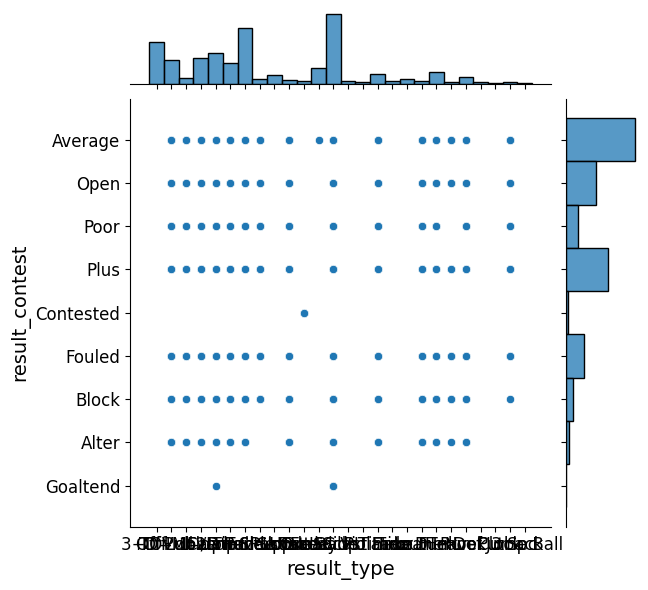

In [82]:
sns.jointplot(data=game_results_df, x="result_type", y="result_contest")

'''
g = sns.JointGrid(data=game_results_df, x="result_type", y="result_contest")
#g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)
'''

# Doesn't really work bc non-numerical data - categorical

#### Vectorizing the results

result_type, result_zone, result_contest

Ideas:
* Dict Vectorizer sklearn https://scikit-learn.org/stable/modules/feature_extraction.html#loading-features-from-dicts
* get_dummies on multiple cols https://stackoverflow.com/questions/24109779/running-get-dummies-on-several-dataframe-columns

In [83]:
game_results_vectors = game_results_df[['result_type', 'result_zone', 'result_contest']]

game_results_vectors.dtypes

result_type       object
result_zone       object
result_contest    object
dtype: object

In [84]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

dict_game_results_vectors = game_results_vectors.to_dict('records')

vectors = vec.fit_transform(dict_game_results_vectors)

pd.DataFrame(vectors.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25585,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [85]:
pd.get_dummies(data=game_results_df, columns=['result_type', 'result_zone', 'result_contest'])


,season,season_type,nba_game_id,home,away,game_date,quarter,poss_id,off_team,def_team,poss_time,poss_margin,poss_type,poss_press,poss_zone,oncourt_id,result_id,result_num,result_off,result_off_id,result_def1,result_def1_id,result_def2,result_def2_id,result_pbp_id,result_pbp_error,result_time,result_tov_reason,result_tov_teammate,result_foul_reason,isAND1,points,self_created,assisted,hcky_assisted,potential_ast,passer_name,passer_nba_id,hcky_passer_name,hcky_passer_nba_id,def1_play,def2_play,orb_win_name,orb_win_nba_id,drb_win_name,drb_win_nba_id,last_updated_time,did_score,result_type_1-2D Pull-Up,result_type_3+D Pull-Up,result_type_Broadcast Error,result_type_Catch & Shoot,result_type_Def. 3 Sec,result_type_Dunk,result_type_Face-Up,result_type_Floater,result_type_Heave,result_type_Hook,result_type_Jump Ball,result_type_Layup,result_type_Leaner,result_type_Loose Ball,result_type_Off-Lob / Tip,result_type_Off-Movement,result_type_PU Fade,result_type_Post Fade,result_type_Putback,result_type_Run Clock,result_type_SC Violation,result_type_Side Out,result_type_TOV,result_type_Take FT,result_type_Take Side,result_type_Timeout,result_zone_Deep Backcourt,result_zone_Left Above Break 3,result_zone_Left Corner 3,result_zone_Left Midrange,result_zone_Left Short Mid,result_zone_Mid-Left Above Break 3,result_zone_Mid-Left Deep Paint,result_zone_Mid-Left Midrange,result_zone_Mid-Left Short Paint,result_zone_Mid-Right Above Break 3,result_zone_Mid-Right Deep Paint,result_zone_Mid-Right Midrange,result_zone_Mid-Right Short Paint,result_zone_Right Above Break 3,result_zone_Right Corner 3,result_zone_Right Midrange,result_zone_Right Short Mid,result_zone_Rim,result_zone_Short Backcourt,result_contest_Alter,result_contest_Average,result_contest_Block,result_contest_Contested,result_contest_Fouled,result_contest_Goaltend,result_contest_Open,result_contest_Plus,result_contest_Poor
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
267,2021,Regular Season,22100002,LAL,GSW,10/19/2021,1,3,LAL,GSW,694,0.0,Halfcourt,0,0,1,0022100002_1_3,1,LeBron James,2544.0,Stephen Curry,201939.0,NaN,NaN,11.0,NaN,687,Def Forced,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Russell Westbrook,201566.0,NaN,NaN,Steal,NaN,NaN,NaN,NaN,NaN,26:31.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
275,2021,Regular Season,22100002,LAL,GSW,10/19/2021,1,11,GSW,LAL,622,-2.0,Halfcourt,0,0,1,0022100002_1_11,1,Stephen Curry,201939.0,Russell Westbrook,201566.0,Kent Bazemore,203145.0,26.0,NaN,612,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26:31.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
283,2021,Regular Season,22100002,LAL,GSW,10/19/2021,1,17,GSW,LAL,532,-1.0,Halfcourt,0,0,1,0022100002_1_19,1,Kevon Looney,1626172.0,DeAndre Jordan,201599.0,NaN,NaN,45.0,NaN,524,NaN,NaN,NaN,0.0,2.0,0.0,1.0,1.0,1.0,Draymond Green,203110.0,Jordan Poole,1629673.0,NaN,NaN,NaN,NaN,NaN,NaN,26:31.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
291,2021,Regular Season,22100002,LAL,GSW,10/19/2021,1,24,GSW,LAL,446,0.0,Halfcourt,0,0,1,0022100002_1_26,1,Draymond Green,203110.0,Kent Bazemore,203145.0,NaN,NaN,61.0,NaN,442,Off Fault,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26:31.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
299,2021,Regular Season,22100002,LAL,GSW,10/19/2021,1,32,LAL,GSW,374,2.0,Halfcourt,0,0,3,0022100002_1_34,1,LeBron James,2544.0,Andre Iguodala,2738.0,NaN,NaN,82.0,NaN,370,NaN,NaN,NaN,0.0,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26:31.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## Modeling

In [86]:
from sklearn.model_selection import train_test_split
modelcols = ["home", "away", "quarter", "off_team", "def_team",
             "play_type", "player_name", "play_zone", "poss_margin", 
             "poss_type", "poss_press", "poss_zone"]



X = pd.get_dummies(game_data_master[modelcols])
y = pd.get_dummies(game_data_master["result_type"])


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 0)

In [87]:
from sklearn.metrics import mean_squared_error
from xgboost import cv

n_estimators = [2,3,4,5,10,20,30,40,50,100]
boosters = ["gbtree", "gblinear", "dart"]
alphas = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
grow_policies = ['depthwise']
max_leaves = [0]
# n_jobs = -1

train_errors = []
test_errors = []


In [88]:
for n in n_estimators:
    for b in boosters:
        for a in alphas:
            for g in grow_policies:
                for l in max_leaves:
                        xgb_regressor = xgb.XGBRegressor(n_estimators = n,
                                                          booster = b,
                                                          n_jobs = -1,
                                                          alpha = a, 
                                                          random_state = 0,
                                                          grow_policy = g,
                                                          max_leaves = l,
                                                          missing = np.nan,
                                                          eval_metric = mean_squared_error)
                                                         
'''
,
tree_method='gpu_hist',
gpu_id=0
)

# Mikey ADDED GPU compatibility to test improved runtimes in the event we have to rerun.
# https://xgboost.readthedocs.io/en/stable/gpu/index.html
'''
                                                        
                        
                        xgb_regressor.fit(X_train, y_train)
                        xgb_regressor_test_pred = xgb_regressor.predict(X_test)
                        xgb_regressor_train_pred = xgb_regressor.predict(X_train)
                        train_mse = mean_squared_error(xgb_regressor_train_pred, y_train)
                        test_mse = mean_squared_error(xgb_regressor_test_pred, y_test)
                        train_errors.append([n,b,a,g,l,train_mse])
                        print([n,b,a,g,l,test_mse])
                        test_errors.append([n,b,a,g,l,test_mse])


test_error_opt = [e for e in test_errors if e[-1] == min(f[-1] for f in test_errors)]
print(test_error_opt)

                        
                                                        


IndentationError: unexpected indent (2968690140.py, line 16)

In [91]:
xgb_regressor = xgb.XGBRegressor(n_estimators = 100,
                                  booster = 'gbtree',
                                  n_jobs = -1,
                                  alpha = 0.9, 
                                  random_state = 0,
                                  grow_policy = 'depthwise',
                                  max_leaves = 0,
                                  missing = np.nan,
                                  eval_metric = mean_squared_error,
                                  tree_method='gpu_hist',
                                  gpu_id=0
                                  )
                    
# Mikey ADDED GPU compatibility to test improved runtimes in the event we have to rerun.
# https://xgboost.readthedocs.io/en/stable/gpu/index.html

                                                        


xgb_regressor.fit(X_train, y_train)
xgb_regressor_test_pred = xgb_regressor.predict(X_test)
xgb_regressor_train_pred = xgb_regressor.predict(X_train)
train_mse = mean_squared_error(xgb_regressor_train_pred, y_train)
test_mse = mean_squared_error(xgb_regressor_test_pred, y_test)

C:\Users\perso\anaconda3\envs\Shark_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


ValueError: Invalid shape: (15757, 20) for label